## <center>Elements Of Data Science - F2021</center>
# <center>Week 9: Dimensionality Reduction, Feature Selection and Feature Extraction<center>
### <center>11/15/2021</center>

# TODOs

- Readings:
  - PML Chapter 6, first 3 sections on Pipelines
  - PML Chapter 8: Applying Machine Learning to Sentiment Analysis
<br>
<br>
- Quiz 9, Due **Sunday Nov 21st, 11:59pm ET**
- HW3, Due **Tues Nov 23 at 11:59pm ET**
<br>

# Today

- **Joining Datasets**
- **Dimensionality Reduction**
  - **Feature Selection**
     - Linear Model with LASSO
     - Tree Based Models Feature Importance
     - Univariate Tests
     - Recursive Feature Selection
  - **Aside: Adjusted $R^2$**

  - **Feature Extraction**
     - PCA
- **Example: Image Recognition Using PCA**
- **Pipelines?**
 

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_clients = pd.DataFrame([[102,'Mikel','Rouse',1002],
                   [103,'Laura','Gibson',1003],
                   [104,None,'Reeves',1003],
                   [105,'Scott','Payseur',1004]],columns=['client_id', 'firstname', 'lastname', 'home_address_id'])


df_addresses = pd.DataFrame([[1002,'1 First Ave.'],[1003,'2 Second Ave.'],[1005,'3 Third Ave.']],
                         columns=['address_id','address'])

# Joing Datasets

- often have two sets of data we need to join together

In [3]:
df_flower_name_orig = pd.DataFrame([[1001,'iris'],[1002,'rose']],
                         columns=['flower_id','name'])

df_flower_price_orig = pd.DataFrame([[1002,3.99],[1003,2.25]],
                               columns=['flower_id','price'])

In [4]:
display(df_flower_name_orig)
display(df_flower_price_orig)

,flower_id,name
0,1001,iris
1,1002,rose


,flower_id,price
0,1002,3.99
1,1003,2.25


# Joing Datasets On Index

- easiest way to join in Pandas is on row index label
- may need to set the index from a column using `.set_index()`

In [5]:
df_flower_name_orig

,flower_id,name
0,1001,iris
1,1002,rose


In [6]:
df_flower_name = df_flower_name_orig.set_index('flower_id') # note: inplace=False, drop=True by default, 
df_flower_name

,name
flower_id,
1001,iris
1002,rose


In [7]:
df_flower_price = df_flower_price_orig.copy()
df_flower_price.set_index('flower_id',inplace=True)
df_flower_price

,price
flower_id,
1002,3.99
1003,2.25


# Joining Datasets in Pandas On Index Using `df.join()`

In [8]:
display(df_flower_name)
display(df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [9]:
df_flower_name.join(df_flower_price)

,name,price
flower_id,,
1001,iris,NaN
1002,rose,3.99


- by default, this is a 'Left Join'

### Join Types: Left Join
<div align="center"><img src="images/join_left.png" width="300px"></div>

In [10]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [11]:
df_flower_name.join(df_flower_price,how="left") # default for df.join() is left join

,name,price
flower_id,,
1001,iris,NaN
1002,rose,3.99


### Join Types: Right Join
<div align="center"><img src="images/join_right.png" width="300px"></div>

In [12]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [13]:
df_flower_name.join(df_flower_price,how='right')

,name,price
flower_id,,
1002,rose,3.99
1003,NaN,2.25


### Join Types: Inner Join
<div align="center"><img src="images/join_inner.png" width="300px"></div>

In [14]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [15]:
df_flower_name.join(df_flower_price,how='inner')

,name,price
flower_id,,
1002,rose,3.99


### Join Types: Outer Join
<div align="center"><img src="images/join_outer.png" width="300px"></div>

In [16]:
display(df_flower_name,df_flower_price)

,name
flower_id,
1001,iris
1002,rose


,price
flower_id,
1002,3.99
1003,2.25


In [17]:
df_flower_name.join(df_flower_price,how='outer')

,name,price
flower_id,,
1001,iris,NaN
1002,rose,3.99
1003,NaN,2.25


# Setting the Index When Reading in Data

- instead of using `.set_index()`, can specify `index_col=`


In [18]:
# this csv has column for purchase_id
pd.read_csv('../data/flowershop_data_with_dups.csv'
           ).head(2)


,purchase_id,lastname,purchase_date,stars,price,favorite_flower
0,1000,PERKINS,2017-04-08,5,19.599886,iris
1,1001,ROBINSON,2017-01-01,5,37.983904,NaN


In [19]:
# can set the index when reading in the csv
pd.read_csv('../data/flowershop_data_with_dups.csv',
            index_col='purchase_id'
           ).head(2)


,lastname,purchase_date,stars,price,favorite_flower
purchase_id,,,,,
1000,PERKINS,2017-04-08,5,19.599886,iris
1001,ROBINSON,2017-01-01,5,37.983904,NaN


# Joining on the Index using `.join()`

In [20]:
# imagine that 'name' is a categorical variable
df_flower_name[['name']]

,name
flower_id,
1001,iris
1002,rose


In [21]:
# converting categorical to one-hot using get_dummies
pd.get_dummies(df_flower_name['name'],prefix='flower_name')

,flower_name_iris,flower_name_rose
flower_id,,
1001,1,0
1002,0,1


In [22]:
# can join back using the default index
df_flower_name[['name']].join(pd.get_dummies(df_flower_name['name'],prefix='flower_name'))

,name,flower_name_iris,flower_name_rose
flower_id,,,
1001,iris,1,0
1002,rose,0,1


# Join on Columns Instead of Index using `pd.merge()`

- to do more complicated joins, use `pd.merge()`

In [23]:
# using the dataframes before setting index using .set_index()
pd.merge(df_flower_name,
         df_flower_price, 
         left_on='flower_id',
         right_on='flower_id') # what is the default join for merge?

,name,price
flower_id,,
1002,rose,3.99


In [24]:
# if both id columns have the same name, use on
pd.merge(df_flower_name,
         df_flower_price,
         on='flower_id',
         how='outer') 

,name,price
flower_id,,
1001,iris,NaN
1002,rose,3.99
1003,NaN,2.25


# Joining Datasets Review

- Use `.join()` when you can, using dataframe indices
- May need to set the dataframe indices (`.set_index()` or `index_col=`)
- Know the different general join types: Left, Right, Inner, Outer
- Use `pd.merge()` when you need something more complicated

<br>
<br>

# <center>Questions?</center>
<br>
<br>


<br>
<br>

# <center>Dimensionality Reduction</center>
<br>
<br>

# Recall: Methods for Avoiding Overfitting
<br>

- Collect additional examples
- Use a simpler model
- Regularization
- **Reduce the dimensions of our data: Dimensionality Reduction**

# Dimensionality Reduction
<br>

- Reasons to reduce the number of features:
 - improve *model performance* (reducing complexity reducing chance of overfitting)
 - improve *speed performance* (reducing number of calculations)
 - *interpretation* (which features are most important?)
<br>
<br>

- **Feature Selection**
 - choose a subset of original features
<br>
<br>
- **Feature Extraction**
 - combine/transform features to generate a new feature space

# Load Binary Wine Classification

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()

X_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
y_wine = wine.target

# reduce to binary classification
X_wine = X_wine.iloc[y_wine < 2]
y_wine = y_wine[y_wine < 2]

X_train,X_test,y_train,y_test = train_test_split(X_wine,y_wine,random_state=0)
X_train.columns.values

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [26]:
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0


# Need to Standardize Features

In [27]:
X_train.agg(['mean','std']).T.sort_values('mean',ascending=False)

,mean,std
proline,770.381443,351.632012
magnesium,99.649485,15.215837
alcalinity_of_ash,18.926804,3.162986
alcohol,12.876392,0.882710
color_intensity,4.112680,1.660242
od280/od315_of_diluted_wines,2.933299,0.452246
total_phenols,2.479175,0.537158
flavanoids,2.426598,0.672639
ash,2.338660,0.279052
malic_acid,2.033402,0.979120


# Standardize Features

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)

X_test = ss.transform(X_test)

In [29]:
X_train.agg(['mean','std']).T.sort_values('mean',ascending=False)

,mean,std
total_phenols,2.028160e-15,1.005195
flavanoids,6.638447e-16,1.005195
alcalinity_of_ash,4.727032e-16,1.005195
magnesium,3.694067e-16,1.005195
alcohol,1.281907e-16,1.005195
proline,-3.204767e-17,1.005195
proanthocyanins,-1.110223e-16,1.005195
nonflavanoid_phenols,-2.495140e-16,1.005195
color_intensity,-4.051742e-16,1.005195
malic_acid,-4.229149e-16,1.005195


# Recall: Predicting vs Transforming with Train/Test Split
<br>
- When transforming data, fit on the training set, transform both train and test
<br>
<br>

<div align="center"><img src="images/transformation_pipeline.png" width="900px"></div>

From PML

# Recall: Predicting vs Transforming with Train/Test Split
<br>
- When performing prediction, train on the training set, evaluate on the test set
<br>

<div align="center"><img src="images/modelpredict_pipeline.png" width="500px"></div>

From PML

# Feature Selection
<br>

- Select a subset of features
- Based on how much they contribute to predicting the target 'y'

- From the Model
    - Linear Model with LASSO Regularization
    - Tree Based Models Feature Importance
- Univariate Tests
- Recursive Feature Selection

# Feature Selection: LASSO (L1)

- LASSO or $\ell_1$ or `l1` regularization drives the coefficient of uninformative features to 0

In [30]:
from sklearn.linear_model import LogisticRegression

# First, without regularization
#   C is the inverse regularization strength: higher means less regularization
logr = LogisticRegression(C=100, penalty="l1", solver="liblinear", random_state=123)
logr.fit(X_train, y_train)
logr.coef_[0,:5]

array([-5.74709641, -1.20824931, -2.70057811,  2.47398434, -0.28304842])

In [31]:
sorted_tuples = sorted(list(zip(X_train.columns.values,logr.coef_[0])),key=lambda x:x[1],reverse=True)
for feature,coef in sorted_tuples:
    print(f'{feature:30s} : {coef: 0.3f}')

alcalinity_of_ash              :  2.474
proanthocyanins                :  1.144
hue                            :  1.069
nonflavanoid_phenols           :  0.000
total_phenols                  : -0.146
magnesium                      : -0.283
flavanoids                     : -0.376
color_intensity                : -0.638
od280/od315_of_diluted_wines   : -0.860
malic_acid                     : -1.208
ash                            : -2.701
alcohol                        : -5.747
proline                        : -7.568


# Feature Selection: LASSO (L1) Cont.

In [32]:
# Now with LASSO
logr = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", random_state=123)
logr.fit(X_train, y_train)

sorted_tuples = sorted(list(zip(X_train.columns.values,logr.coef_[0])),key=lambda x:x[1],reverse=True)
for feature,coef in sorted_tuples:
    print(f'{feature:30s} : {coef: 0.3f}')

malic_acid                     :  0.000
ash                            :  0.000
alcalinity_of_ash              :  0.000
magnesium                      :  0.000
total_phenols                  :  0.000
nonflavanoid_phenols           :  0.000
proanthocyanins                :  0.000
color_intensity                :  0.000
hue                            :  0.000
od280/od315_of_diluted_wines   :  0.000
flavanoids                     : -0.007
alcohol                        : -0.982
proline                        : -1.102


In [33]:
# which columns were kept?
X_train.columns[logr.coef_[0] != 0]

Index(['alcohol', 'flavanoids', 'proline'], dtype='object')

# Feature Selection: Tree Based Model Feature Importance

- Trees choose questions based on removing impurity
- We can rank the feature based on how much impurity they remove

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123).fit(X_train,y_train)
rf.feature_importances_ # (normalized) total reduction of function measuring impurity

array([0.27332426, 0.01783127, 0.01145411, 0.05480187, 0.05158374,
       0.05521824, 0.10260545, 0.01117794, 0.01033494, 0.13339066,
       0.00759636, 0.0216486 , 0.24903258])

In [35]:
feature_importances = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importances.sort_values(ascending=False).round(3)

alcohol                         0.273
proline                         0.249
color_intensity                 0.133
flavanoids                      0.103
total_phenols                   0.055
alcalinity_of_ash               0.055
magnesium                       0.052
od280/od315_of_diluted_wines    0.022
malic_acid                      0.018
ash                             0.011
nonflavanoid_phenols            0.011
proanthocyanins                 0.010
hue                             0.008
dtype: float64

# Feature Selection: Tree Based Model Feature Importance

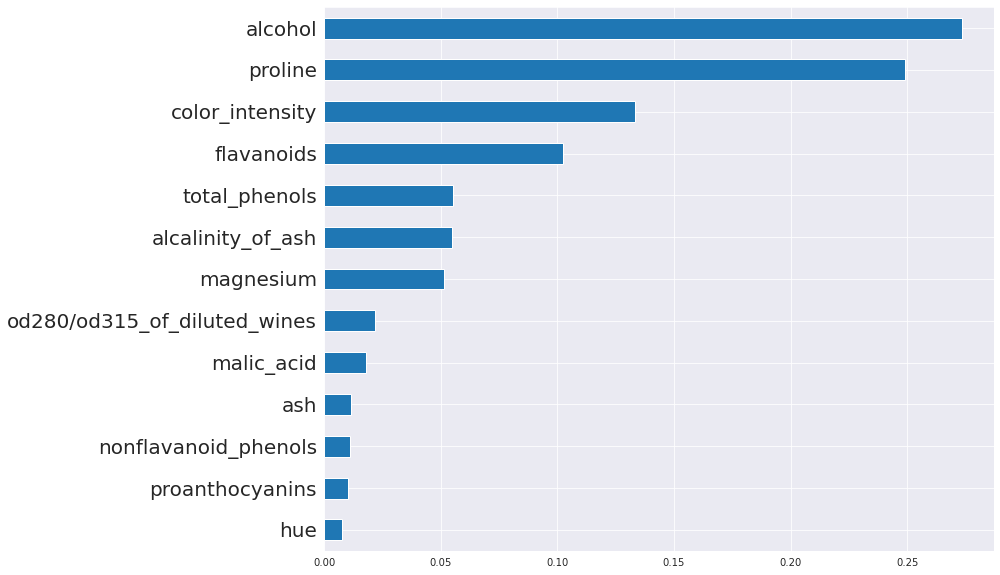

In [36]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
feature_importances.sort_values().plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20);

Which of these should we keep? Elbow method? Threshold at mean?

# Feature Selection: SelectFromModel

In [37]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(logr,
                      threshold=None, # if model uses l1 regularization, anything greater than 1e-5, otherwise mean
                      prefit=True     # do not need to re-fit
                     )

sfm.get_support() # boolean mask of features selected

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False,  True])

In [38]:
X_train.columns[sfm.get_support()]

Index(['alcohol', 'flavanoids', 'proline'], dtype='object')

In [39]:
X_train_subset = sfm.transform(X_train)
X_train_subset.shape

(97, 3)

In [40]:
X_train_subset[:3] # note that this is no-longer a dataframe

array([[ 0.17492287, -0.59267761, -1.08166225],
       [-0.62220886, -0.86167036, -0.05826353],
       [ 1.51865922,  0.33385297,  0.88509284]])

# Feature Selection: SelectFromModel Cont.

In [41]:
sfm_rf = SelectFromModel(RandomForestClassifier(),
                         threshold='mean',   # return all features with value greater than the mean
                         prefit=False        # will refit
                        ).fit(X_train,y_train)

X_train.columns[sfm_rf.get_support()]

sfm_rf = SelectFromModel(RandomForestClassifier(),threshold='mean')
X_train_subset = sfm_rf.fit_transform(X_train,y_train)
X_test_subset = sfm_rf.transform(X_test)

In [42]:
sfm_rf.estimator_.feature_importances_.mean()

0.07692307692307693

In [43]:
feature_importances = pd.Series(sfm_rf.estimator_.feature_importances_,index=X_train.columns)
feature_importances.sort_values(ascending=False).round(3)

proline                         0.284
alcohol                         0.229
color_intensity                 0.157
flavanoids                      0.101
total_phenols                   0.058
magnesium                       0.057
alcalinity_of_ash               0.048
od280/od315_of_diluted_wines    0.015
nonflavanoid_phenols            0.014
ash                             0.010
hue                             0.010
proanthocyanins                 0.009
malic_acid                      0.008
dtype: float64

# Feature Selection: Univariate Tests

- Perform statistical test on each feature **independent of all others**
  - Rank and select top k features
  - sklearn: `SelectKBest`
  - requires a scoring function
<br>

- Example: `f_classif`
  - F-test
  - estimates the degree of linear dependency between feature x and target y

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

# select 2 best features
kbest = SelectKBest(score_func=f_classif, # default,
                    k=3                   # how many features to keep
                   ).fit(X_train, y_train)
list(X_wine.columns[kbest.get_support()])

['alcohol', 'color_intensity', 'proline']

# Feature Selection: Recursive Feature Elimination

- Would like to test all possible combinations of features
- Likely prohibitively expensive/time-consuming
- Instead recursively select smaller subsets of features
- Requires a model that assigns weights or importance to features

In [45]:
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression(penalty='none'), # turn of regularization
          n_features_to_select=3,             # number of feature to retain
          step=1                              # number of features to eliminate each round
         ).fit(X_train,y_train)

X_train.columns[rfe.get_support()]

Index(['alcohol', 'alcalinity_of_ash', 'proline'], dtype='object')

# Feature Selection: Other Methods

- by **Variance**
 - eliminate columns where all rows have the same (or almost all the same) value
- **Sequential Feature Selection**
 - greedy algorithm similar to Recursive Feature Elimination
 - uses performance metric (eg accuracy) instead of weights, importances
 - via `mlxtend`
- **Exaustive Feature Selection**
 - evaluate all possible feature combinations
 - uses performance metric (eg accuracy) instead of weights, importances
 - via `mlxtend`
- Other **Univariate tests**
 - `f_regression`, F-test for regression task
 - `mutual_info_classif` and `_regression`
 - `chi2`, for classification, requires non-negative values



<br>
<br>

# <center>Questions on Feature Selection?</center>
<br>
<br>

# Changing number of features: Use Adjusted $R^2$

- Adding features guarantees an increase in $R^2$
- $R^2$ describes the proportion of explained variance
- Additional features explain more variance

$$R_{adj}^2 = 1-(1-R^2)\frac{n-1}{n-m-1}$$

- where $n$ is the number of observations, $m$ is the number of features

In [46]:
def adj_r2(model,X,y):
    n,m = X.shape
    return 1-(1-model.score(X,y))*(n-1)/(n-m-1)

# Changing number of features: Use Adjusted $R^2$ Cont.

In [47]:
from sklearn.linear_model import LinearRegression

X_r = X_train.iloc[:,1:]
y_r = X_train.iloc[:,0]  # predict alcohol from other features

lr = LinearRegression()
print(lr.fit(X_r.iloc[:,:3],y_r).score(X_r.iloc[:,:3],y_r))
print(lr.fit(X_r.iloc[:,:],y_r).score(X_r.iloc[:,:],y_r))

0.3940307310415285
0.7455685143343734


Is this due to a better model or just adding features?

In [48]:
print(adj_r2(lr.fit(X_r.iloc[:,:3],y_r),X_r.iloc[:,:3],y_r))
print(adj_r2(lr.fit(X_r.iloc[:,:],y_r),X_r.iloc[:,:],y_r))

0.3744833352686746
0.7092211592392839


- Now we know the increase is due to a better model and not just adding features

# Changing number of features: Use Adjusted $R^2$ Cont.

In [49]:
from statsmodels.api import OLS

model = OLS(y_r,X_r).fit()
print(model.rsquared_adj)
model.summary()

0.709648775181579


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                alcohol   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              20.76
Date:                Mon, 15 Nov 2021   Prob (F-statistic):                    2.12e-20
Time:                        14:22:21   Log-Likelihood:                         -71.254
No. Observations:                  97   AIC:                                      166.5
Df Residuals:                      85   BIC:                                      197.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
malic_acid                       0.1412      0.064      2.201      0.030       0.014       0.269
ash                             -0.0380      0.080     -0.473      0.637      -0.197       0.122
alcalinity_of_ash               -0.0283      0.082     -0.347      0.730      -0.191       0.134
magnesium                        0.1268      0.072      1.763      0.081      -0.016       0.270
total_phenols                   -0.1925      0.116     -1.665      0.100      -0.422       0.037
flavanoids                       0.2984      0.149      1.996      0.049       0.001       0.596
nonflavanoid_phenols            -0.0106      0.087     -0.122      0.903      -0.183       0.162
proanthocyanins                 -0.1724      0.076     -2.257      0.027      -0.324      -0.021
color_intensity                  0.3969      0.116      3.423      0.001       0.166       0.627
hue                             -0.0260      0.064     -0.410      0.683      -0.152       0.100
od280/od315_of_diluted_wines     0.1999      0.078      2.568      0.012       0.045       0.355
proline                          0.2967      0.101      2.936      0.004       0.096       0.498
==============================================================================
Omnibus:                        4.328   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.747
Skew:                           0.359   Prob(JB):                        0.154
Kurtosis:                       3.641   Cond. No.                         7.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

# <center>Questions re Adjusted $R^2$?</center>
<br>
<br>

# Feature Extraction

- Transform original features into new feature space
- Can be thought of as compression while maintaining relevant information
- Often used for:
 - visualization (multi-dimensional to 2-D)
 - compression (storage)
 - dimensionality reduction
 
- Popular methods:
 - **Principal Component Analysis:** Unsupervised data compression
 - Linear Discriminant Analysis: Supervised method to maximize class separation
 - Kernel PCA, etc.

# Principal Component Analysis (PCA)

- Unsupervised Learning method (ignores label)
- Idea: 
 - Directions of high variance in the data contain important information
 - Colinear features can be combined
 - Find directions of maximum variance
 - Project onto subspace with same or fewer dimensions
<br>

# Principal Component Analysis (PCA)
<br>

- How it works:
  0. first center the data (subtract the means)
  1. first component:
    - direction (combination of features)
    - explains maximum variance
  2. next component:
    - direction, orthogonal to the first (linearly independent)
    - explains max remaining variance
  3. repeat:
    - max number of possible components equals number of original dimensions

In [50]:
# function to plot a vector
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(width=3,
                    headwidth=12,
                    shrink=0,
                    color='k'
                    #arrowstyle='->',
                    #linewidth=6,
                    #shrinkA=0,shrinkB=0
                   )
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data, pca vectors and pca planes
def plot_pca(df,pca,num_components=1,colors=['r','g'],fig=None):
    fig = fig or plt.figure(figsize=(14,6))
    plt.subplot2grid((2,2), (0, 0), rowspan=2)
    sns.scatterplot(x=df.columns[0],y=df.columns[1],data=df);
    plt.scatter(1,2,c='k',linewidths=5)

    for i in range(num_components):
        length = pca.explained_variance_[i]
        vector = pca.components_[i]
        slope0 = vector[1] / vector[0]
        _= plt.plot([-3,3],[slope0*-3,slope0*3],color=colors[i])
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_,pca.mean_ + v)
    plt.gca().set_aspect('equal')
    #plt.axis([-8.5, 8.5, -8.5, 8.5])
    X = pca.transform(df)
    for i in range(num_components):
        plt.subplot2grid((2,2), (i, 1))
        plt.plot([-4,4],[0,0],colors[i])
        sns.scatterplot(x=X[:,i],y=[0]*len(X));
        plt.scatter(pca.transform([[1,2]])[0][i],0,color='k',linewidths=5)
        plt.axis([-4.5, 4.5, -1, 1]);
        plt.xlabel('component '+str(i))

# PCA Example

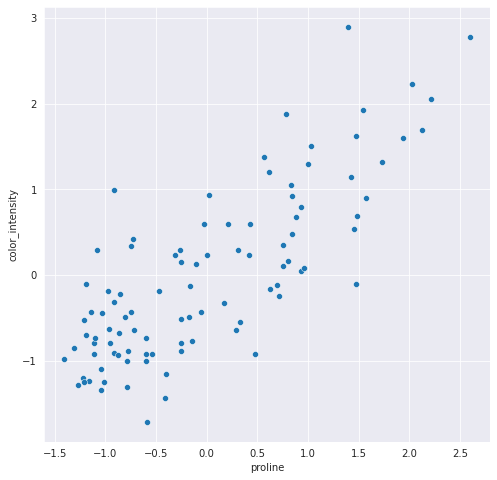

In [51]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(x='proline',y='color_intensity',data=X_train,ax=ax);

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train[['proline','color_intensity']])

# PCA Example Cont.

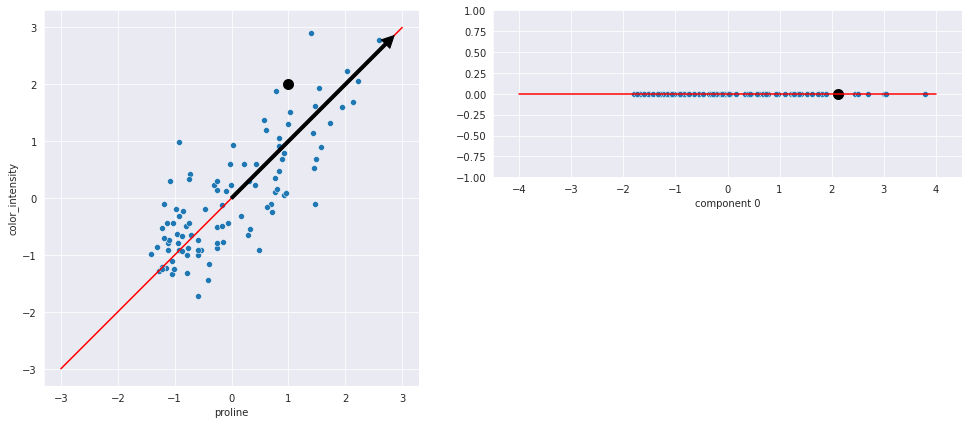

In [53]:
plot_pca(X_train[['proline','color_intensity']],pca,num_components=1)
plt.tight_layout()

# PCA Example Cont.

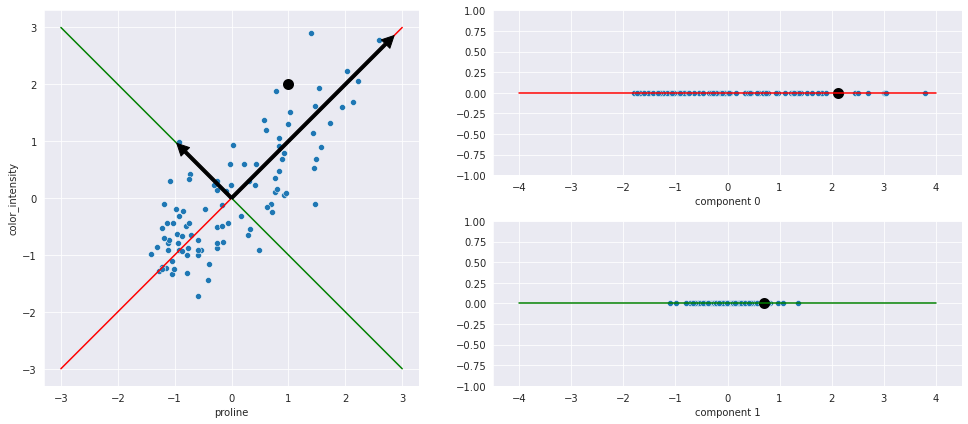

In [54]:
plot_pca(X_train[['proline','color_intensity']],pca,num_components=2)
plt.tight_layout()

# PCA in sklearn

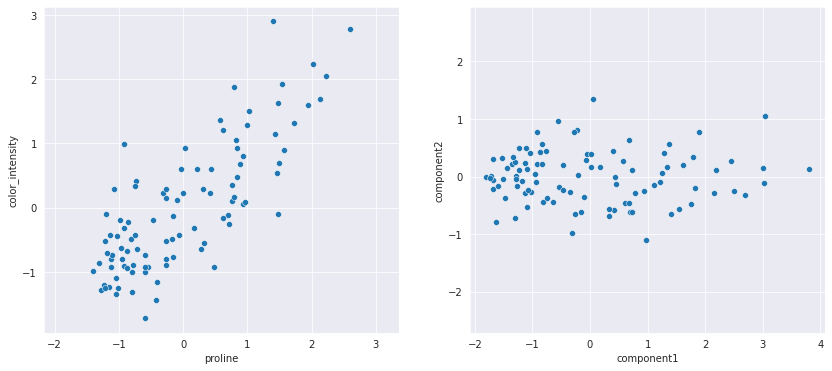

In [55]:
from sklearn.decomposition import PCA

# extract the first 2 principle compenents
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[['proline','color_intensity']])

X_pca = pd.DataFrame(X_pca,columns=['component1','component2'])


fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x='proline',y='color_intensity',data=X_train,ax=ax[0]);
sns.scatterplot(x='component1',y='component2',data=X_pca,ax=ax[1]);
ax[0].axis('equal');ax[1].axis('equal');

# PCA: Explained Variance
<br>

- How much of the variance is explained by each component?

In [56]:
pca.explained_variance_ratio_

array([0.89808764, 0.10191236])

# PCA: Principle Components
<br>

- What does the first component (vector) look like?

In [57]:
pca.components_[0]

array([0.70710678, 0.70710678])

- And the second?

In [58]:
pca.components_[1]

array([-0.70710678,  0.70710678])

- All components returned

In [59]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [60]:
# Can also return the singular values themselves
pca.singular_values_

array([13.1995834 ,  4.44645904])

# Dimensionality Reduction with PCA

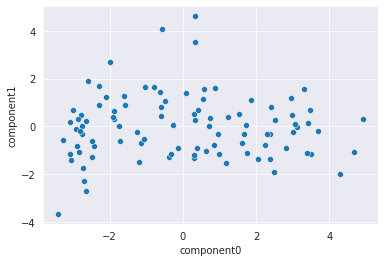

In [61]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train)
X_2d = pd.DataFrame(X_2d, columns=["component"+str(i) for i in range(2)])
sns.scatterplot(x='component0',y='component1',data=X_2d);

In [62]:
print(' + \n'.join([f'{w: 0.2f}*{f}' for f,w in sorted(zip(X_train.columns,pca_2d.components_[0]),key=lambda x:x[1])]))

-0.28*nonflavanoid_phenols + 
-0.26*alcalinity_of_ash + 
-0.03*hue + 
 0.01*malic_acid + 
 0.11*ash + 
 0.21*proanthocyanins + 
 0.23*magnesium + 
 0.25*od280/od315_of_diluted_wines + 
 0.36*proline + 
 0.36*color_intensity + 
 0.36*total_phenols + 
 0.37*alcohol + 
 0.39*flavanoids


In [63]:
pca_2d.components_

array([[ 0.36733214,  0.00549227,  0.11190797, -0.25939926,  0.23258252,
         0.36400809,  0.39036058, -0.27650372,  0.20948443,  0.36335279,
        -0.03275396,  0.24799821,  0.36236509],
       [-0.10690524,  0.51012671, -0.00107632,  0.26118437, -0.14060643,
         0.16490533,  0.1128431 , -0.17937195,  0.29617847, -0.25034748,
        -0.4633292 ,  0.36822912, -0.25998   ]])

<br>
<br>

# <center>Image Recognition Example</center>
<br>
<br>

# PCA and Image Recognition

- Generally, an image is represented by a grid of pixels
- Each pixel is a square that takes a value representing a shade (usually a value between 0 and 255)
- 1024 x 1024 pixels = 1,048,576 pixels = 1 megapixel
- iPhone X11 Pro : 12 megapixels
- Color images contain three layers: red, green, blue
- ~36 million pixel values
- A very high dimensional space!
<br>

- Image classification using PCA?
 - Example based on [Faces recognition example using eigenfaces and SVMs](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py)


# Example Dataset: Labeled Faces in th Wild (LFW)
<br>

[Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)

In [64]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

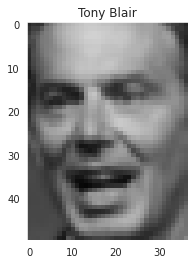

In [65]:
sns.set_style('dark')
plt.imshow(lfw_people.images[1], cmap=plt.cm.gray, vmin=0, vmax=255)
plt.title(lfw_people.target_names[lfw_people.target[1]], size=12);

# Example Pixel Values

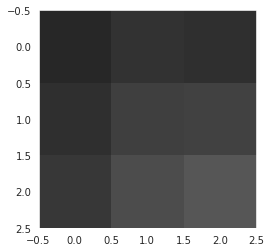

In [66]:
# first 3x3 set of pixels
plt.imshow(lfw_people.images[1][:3,:3],cmap=plt.cm.gray,vmin=0, vmax=255);

In [67]:
lfw_people.images[1][:3,:3]

array([[39.666668, 50.333332, 47.      ],
       [47.666668, 63.      , 65.333336],
       [55.333332, 76.666664, 86.333336]], dtype=float32)

# Representing each Image: Flatten
<br>

- Grid as a fixed length feature vector?

In [68]:
lfw_people.images[1].shape

(50, 37)

In [69]:
x = lfw_people.images[1].reshape(1,-1)
x

array([[ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ]], dtype=float32)

In [70]:
x.shape

(1, 1850)

What information do we lose when we do this?

# Create a Dataset

In [71]:
# get the shape of images for plotting the
n_samples, h, w = lfw_people.images.shape

# use actual pixel values, ignoring relative position
X_faces = lfw_people.data
n_features = X_faces.shape[1]

# the label to predict is the id of the person
y_faces = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# create train/test split
X_train_faces, X_test_faces, y_train_faces, y_test_faces = train_test_split(X_faces, y_faces,
                                                                            test_size=0.25,
                                                                            stratify=y_faces,
                                                                            random_state=123)
print(f"image_size: {h}x{w}")
print("n_features: %d" % n_features)
print("n_classes : %d" % n_classes)
print(f"n_train   : {len(X_train_faces)}")
print(f"n_test    : {len(X_test_faces)}")

image_size: 50x37
n_features: 1850
n_classes : 7
n_train   : 966
n_test    : 322


# Compute PCA and Transform

In [72]:
# set the number of dimensions we want to retain
n_components = 150

# instantiate and fit on X_train
pca_faces = PCA(n_components=n_components,
                svd_solver='randomized',
                whiten=True).fit(X_train_faces)

# extract and reshape components into eigenfaces for plotting
eigenfaces = pca_faces.components_.reshape((n_components, h, w))

# transform the training and test set for classification
X_train_pca_faces = pca_faces.transform(X_train_faces)
X_test_pca_faces = pca_faces.transform(X_test_faces)

In [73]:
pca_faces.components_[0]

array([-0.01278668, -0.01292658, -0.01463957, ..., -0.00385124,
       -0.00411337, -0.0045574 ], dtype=float32)

In [74]:
pca_faces.singular_values_

array([21388.467  , 19735.988  , 13733.558  , 12266.252  , 11349.948  ,
        8755.401  ,  7928.223  ,  7296.223  ,  7035.028  ,  6864.7207 ,
        6348.1304 ,  6118.6055 ,  5526.047  ,  5221.793  ,  4977.621  ,
        4962.2236 ,  4785.6265 ,  4679.6924 ,  4524.9766 ,  4275.846  ,
        4209.652  ,  4032.5813 ,  3924.0525 ,  3801.2917 ,  3723.4976 ,
        3675.6616 ,  3581.645  ,  3497.1353 ,  3378.749  ,  3268.003  ,
        3137.3608 ,  3030.9197 ,  3017.3242 ,  2981.4546 ,  2897.5417 ,
        2858.5464 ,  2792.041  ,  2762.1348 ,  2726.447  ,  2702.855  ,
        2661.0544 ,  2591.7307 ,  2543.3933 ,  2526.289  ,  2459.802  ,
        2429.5876 ,  2417.179  ,  2379.5273 ,  2339.4941 ,  2332.3047 ,
        2293.3118 ,  2283.203  ,  2221.0967 ,  2194.8472 ,  2160.4968 ,
        2144.4883 ,  2110.5505 ,  2088.7078 ,  2063.9463 ,  2043.5891 ,
        2025.4708 ,  2015.7623 ,  1991.989  ,  1967.3948 ,  1934.7207 ,
        1919.0978 ,  1903.6674 ,  1882.6061 ,  1860.8585 ,  1841

# Eigenfaces

- What if we plot the top 12 components (eigenfaces) using .reshape(h,w)?

In [75]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

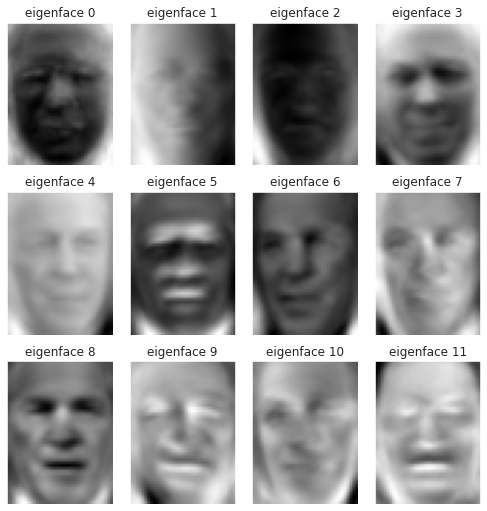

In [76]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.tight_layout()

# Train and Tune SVC

In [77]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_faces = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                         params, cv=3, n_jobs=-1)
clf_faces = clf_faces.fit(X_train_pca_faces, y_train_faces)

CPU times: user 258 ms, sys: 133 ms, total: 391 ms
Wall time: 2.71 s


In [78]:
print(f"best_params : {clf_faces.best_params_}")
print(f"best_score  : {clf_faces.best_score_:0.2f}")

best_params : {'C': 1000.0, 'gamma': 0.005}
best_score  : 0.79


# Evaluate on the test set

In [79]:
y_pred = clf_faces.predict(X_test_pca_faces)
from sklearn.metrics import classification_report
print(classification_report(y_test_faces, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.74      0.82        19
     Colin Powell       0.82      0.86      0.84        59
  Donald Rumsfeld       0.89      0.83      0.86        30
    George W Bush       0.84      0.97      0.90       133
Gerhard Schroeder       1.00      0.52      0.68        27
      Hugo Chavez       1.00      0.61      0.76        18
       Tony Blair       0.84      0.89      0.86        36

         accuracy                           0.86       322
        macro avg       0.90      0.77      0.82       322
     weighted avg       0.87      0.86      0.85       322



# Prediction Examples

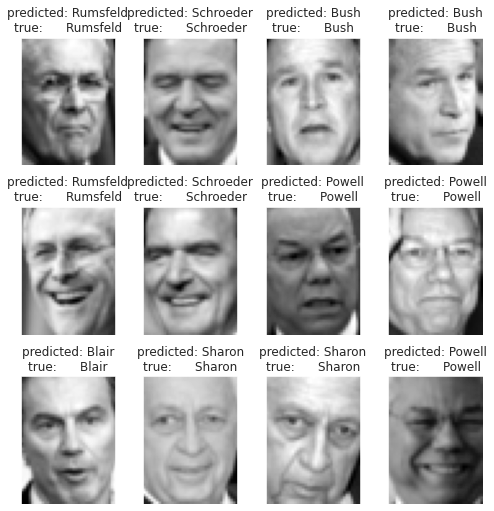

In [80]:
prediction_titles = [title(y_pred, y_test_faces, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test_faces, prediction_titles, h, w)
plt.tight_layout()

# Performance without PCA

# Other Image Recognition Methods

- With Feature Engineering and general models
 - ex: Histogram of Oriented Gradients or HOG (See [PDSH Chap 5](https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html#HOG-Features))
 - many more (See [scikit-image](https://scikit-image.org/))
<br>
<br>

<div align="center"><img src="images/cat_hog.png" width="1600px"></div>
    
<font size=3>From PDSH</font>

# Other Image Recognition Methods: Deep Neural Networks
<br>

- With Deep Neural Nets
<br>

<div align="center"><img src="images/dnn_image_recognition.png" width="800px"></div>
<br>
<br>

<font size=4>From https://www.researchgate.net/figure/Layers-and-their-abstraction-in-deep-learning-Image-recognition-as-measured-by-ImageNet_fig17_326531654</font>

# Other Image Recognition Methods: Deep Neural Networks
<br>

- With Convolutional Neural Networks [Good Example](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721)
<br>
<br>

<div align="center"><img src="images/cnn.jpeg" width="1200px"></div>
<br>
<br>

<font size=3>From https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53</font>

<br>
<br>

# <center>Questions re Feature Extraction and PCA?</center>
<br>
<br>

<br>
<br>

# <center>Next time: NLP and Pipelines</center>
<br>
<br>